Hello, and welcome to the Stock Market Lookup Tool!

When you use the tool, please remember to use the proper stock name for the company you want to look up.

What company's stock data do you want to see? Please input it here (or quit). MSFT
MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.
Maximum Adj. Close = 96.77 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.06 on 1986-03-24 00:00:00.
Current Adj. Close = 89.47 on 2018-03-27 00:00:00.



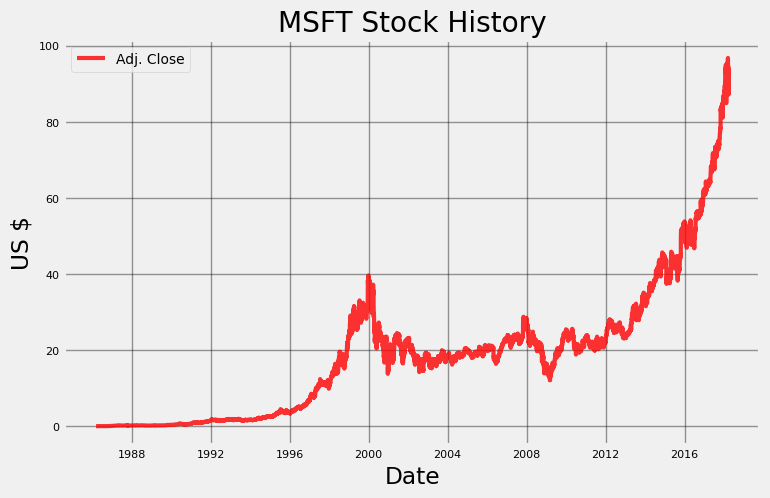

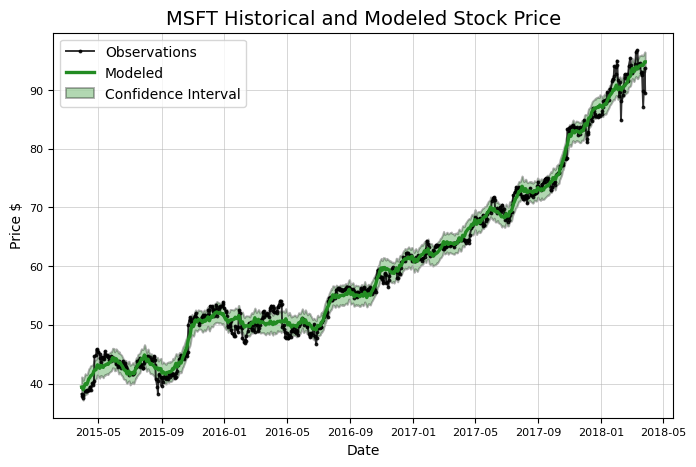

Do you want to see more graphs based on this company data? yes
Here is a line graph of data regarding MSFT.


Here is a candlestick chart of data regarding MSFT.


What company's stock data do you want to see? Please input it here (or quit). GOOG
GOOG Stocker Initialized. Data covers 2014-03-27 00:00:00 to 2018-03-27 00:00:00.
Maximum Adj. Close = 1175.84 on 2018-01-26 00:00:00.
Minimum Adj. Close = 492.55 on 2015-01-12 00:00:00.
Current Adj. Close = 1005.10 on 2018-03-27 00:00:00.



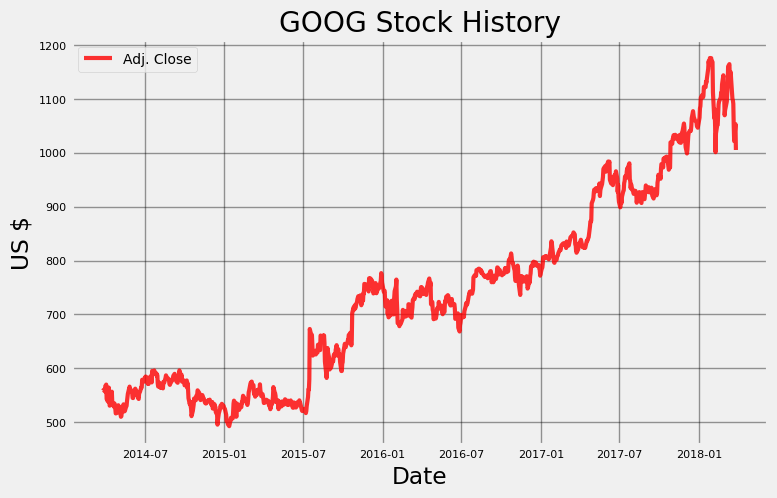

In [ ]:
#importing Stocker, plotly (and other bits), and pandas
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from stocker import Stocker

#preparing the Stocker function
def stock_lookup(ticker):
    """Assigning what stocks you want to know about"""
    stock_analysis = Stocker(ticker)
    stock_analysis_history = stock_analysis.stock
    stock_analysis.plot_stock(plot_type='basic')
    model, model_data = stock_analysis.create_prophet_model()
    
#preparing the class and importing the data
class Graph:
    
    def __init__(self, ticker):
        """Initialize the plotly graph attributes."""
        self.symbol = ticker
        
    def line_graph(self):
        """The plotly line graph that is available to the user."""
        df = pd.read_csv(f'https://www.quandl.com/api/v3/datatables/WIKI/PRICES.csv?ticker={ticker}&api_key=tU7BRRn3YxYwM-Edo8ee')
        fig = px.line(df, x='date', y = 'adj_close',
                     title = f"{self.symbol} Stock Value")
        return fig.show()
    def candlestick(self):
        """The plotly bar graph that is available to the user."""
        df = pd.read_csv(f'https://www.quandl.com/api/v3/datatables/WIKI/PRICES.csv?ticker={ticker}&api_key=tU7BRRn3YxYwM-Edo8ee')
        fig = go.Figure(data=[go.Candlestick(x=df['date'],
                        open=df['adj_open'],
                        high=df['adj_high'],
                        low=df['adj_low'],
                        close=df['adj_close'])])
        return fig.show()
        

print("Hello, and welcome to the Stock Market Lookup Tool!\n")
print("When you use the tool, please remember to use the proper stock name for the company you want to look up.\n")
active = True
while active:
    ticker = input("What company's stock data do you want to see? Please input it here (or quit). ")
    if ticker == 'quit':
        print("\nThank you for using the Stock Market Lookup Tool!")
        active = False
    else:
        stock_lookup(ticker)
        new_graph = input("Do you want to see more graphs based on this company data? ")
        if new_graph == 'yes':
            print(f"Here is a line graph of data regarding {ticker}.")
            user_choice = Graph(ticker)
            user_choice.line_graph()
            print(f"Here is a candlestick chart of data regarding {ticker}.")
            user_choice.candlestick()
        elif new_graph == 'no':
            repeat = input("Do you want to look at another company's records? ")
            if repeat == 'yes':
                print("Refreshing the tool...\n")     
            else:
                print("\nThank you for using the Stock Market Lookup Tool!")
                active = False